## Appendix B1. Logistic Regression

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import balanced_accuracy_score

from sklearn.model_selection import GridSearchCV

save_figures = False
figure_path = "../figures/models/"
# df_init = pd.read_parquet("../data/init.parquet")
# df_before = pd.read_parquet("../data/before_split.parquet")
# df_train = pd.read_parquet("../data/prep_train.parquet")
# df_val = pd.read_parquet("../data/prep_val.parquet")
# df_test = pd.read_parquet("../data/prep_test.parquet")
df_tt_train = pd.read_parquet("../data/prep_tt_train.parquet")
df_tt_test = pd.read_parquet("../data/prep_tt_test.parquet")

In [2]:
df_tt_train.head()

,Year_Y2015,Year_Y2016,Country_England,Country_Wales,Supermarket_Asda,Supermarket_Tesco Extra,Supermarket_Tesco Metro,Supermarket_Waitrose,Time_Evening,Time_Morning,...,YearCountryAge_Y2016EnglandAge_g2,YearCountryAge_Y2016EnglandAge_g3,YearCountryAge_Y2016WalesAge_g1,YearCountryAge_Y2016WalesAge_g2,YearCountryAge_Y2016WalesAge_g3,YearCountryAge_nan,ObsSize,FemaleN,MaleN,y
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.474255,-1.160118,0.858181,1
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.474255,0.589356,-0.999109,1
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.474255,0.589356,-0.999109,1
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.794531,0.589356,0.858181,1
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.474255,-1.160118,0.858181,0


In [3]:
X_tt_train = df_tt_train.iloc[:,0:-1].to_numpy()
y_tt_train = df_tt_train["y"].to_numpy()

X_tt_test = df_tt_test.iloc[:,0:-1].to_numpy()
y_tt_test = df_tt_test["y"].to_numpy()

### Logistic Regression No Penalty

In [4]:
random_state_LR = 132
LR_no = LogisticRegression(penalty = 'none', 
                           solver = 'saga', 
                           random_state = random_state_LR,
                           fit_intercept = False, 
                           max_iter = 10000, 
                           class_weight = 'balanced')
LR_no.fit(X_tt_train, y_tt_train)

LogisticRegression(class_weight='balanced', fit_intercept=False, max_iter=10000,
                   penalty='none', random_state=132, solver='saga')

In [5]:
y_pred_no = LR_no.predict(X_tt_test)
y_prob_no = LR_no.predict_proba(X_tt_test)[:,1]

In [6]:
balanced_accuracy_score(y_tt_test, y_pred_no)

0.6678145695364239

In [7]:
def custom_roc_curve(y_true, y_prob):
    fpr_lr, tpr_lr, p_crits_lr = roc_curve(y_true, y_prob) 
    auc_lr = auc(fpr_lr, tpr_lr)

    fig_lr, ax_lr = plt.subplots()

    display = RocCurveDisplay(fpr=fpr_lr, tpr=tpr_lr, roc_auc=auc_lr)

    display.plot(ax = ax_lr, color = 'navy')

    fig_lr.set_size_inches([8, 6])

    ax_lr.set_xlabel(ax_lr.get_xlabel(), fontsize = 18)
    ax_lr.set_ylabel(ax_lr.get_ylabel(), fontsize = 18)

    ax_lr.grid(linestyle = "dashed")
    ax_lr.legend(loc = 4, fontsize = 16)

    return fig_lr, ax_lr

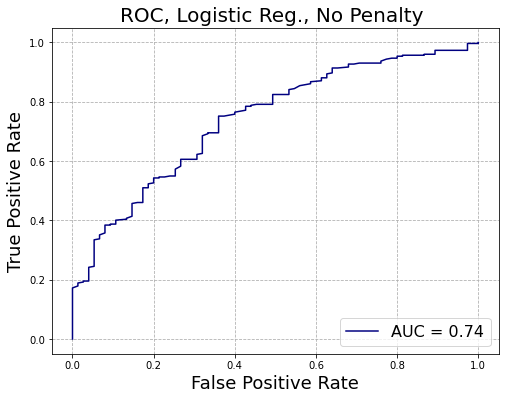

In [8]:
fig_lr_no, ax_lr_no = custom_roc_curve(y_tt_test, y_prob_no)

ax_lr_no.set_title("ROC, Logistic Reg., No Penalty ", fontsize = 20)

# save_figures
if save_figures:
    fig_name = f"{figure_path}ROC Logistic No Penalty"
    fig_lr_no.savefig(f"{fig_name}.pdf", 
                      dpi = 300, 
                      bbox_inches="tight")
    fig_lr_no.savefig(f"{fig_name}.png", 
                      dpi = 300, 
                      bbox_inches="tight")
    fig_lr_no.savefig(f"{fig_name}.svg", 
                      dpi = 300, 
                      bbox_inches="tight")

### Logistic Regression L1 Penalty

In [9]:
random_state_LR = 132
LR_l1 = LogisticRegression(penalty = 'l1', 
                           solver = 'saga', 
                           random_state = random_state_LR,
                           fit_intercept = False, 
                           max_iter = 10000)
LR_l1

LogisticRegression(fit_intercept=False, max_iter=10000, penalty='l1',
                   random_state=132, solver='saga')

In [10]:
c_penalty = np.logspace(-3, 2, 21)
params_l1 = {'C':c_penalty,
             'class_weight':[None, 'balanced']}

gridCV_l1 = GridSearchCV(estimator = LR_l1, 
                         param_grid = params_l1, 
                         scoring = 'balanced_accuracy', 
                         n_jobs = -2,
                         refit = True, 
                         cv = 5)

In [11]:
%%time
gridCV_l1.fit(X_tt_train, y_tt_train)

Wall time: 58.9 s


GridSearchCV(cv=5,
             estimator=LogisticRegression(fit_intercept=False, max_iter=10000,
                                          penalty='l1', random_state=132,
                                          solver='saga'),
             n_jobs=-2,
             param_grid={'C': array([1.00000000e-03, 1.77827941e-03, 3.16227766e-03, 5.62341325e-03,
       1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02]),
                         'class_weight': [None, 'balanced']},
             scoring='balanced_accuracy')

In [12]:
y_pred_l1 = gridCV_l1.predict(X_tt_test)
y_prob_l1 = gridCV_l1.predict_proba(X_tt_test)[:,1]
gridCV_l1.best_params_

{'C': 0.1778279410038923, 'class_weight': 'balanced'}

In [13]:
balanced_accuracy_score(y_tt_test, y_pred_l1)

0.6909933774834438

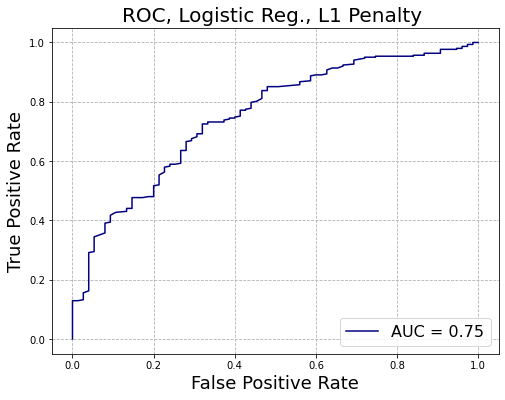

In [14]:
fig_lr_l1, ax_lr_l1 = custom_roc_curve(y_tt_test, y_prob_l1)

ax_lr_l1.set_title("ROC, Logistic Reg., L1 Penalty ", fontsize = 20)

# save_figures
if save_figures:
    fig_name = f"{figure_path}ROC Logistic L1 Penalty"
    fig_lr_l1.savefig(f"{fig_name}.pdf", 
                      dpi = 300, 
                      bbox_inches="tight")
    fig_lr_l1.savefig(f"{fig_name}.png", 
                      dpi = 300, 
                      bbox_inches="tight")
    fig_lr_l1.savefig(f"{fig_name}.svg", 
                      dpi = 300, 
                      bbox_inches="tight")

### Logistic Regression L2 Penalty

In [15]:
random_state_LR = 132
LR_l2 = LogisticRegression(penalty = 'l2', 
                           solver = 'saga', 
                           random_state = random_state_LR,
                           fit_intercept = False, 
                           max_iter = 10000)
LR_l2

LogisticRegression(fit_intercept=False, max_iter=10000, random_state=132,
                   solver='saga')

In [16]:
c_penalty = np.logspace(-3, 2, 21)
params_l2 = {'C':c_penalty, 'class_weight':[None, 'balanced']}

gridCV_l2 = GridSearchCV(estimator = LR_l2, 
                         param_grid = params_l2, 
                         scoring = 'balanced_accuracy', 
                         n_jobs = -2,
                         refit = True, 
                         cv = 5)

In [17]:
%%time
gridCV_l2.fit(X_tt_train, y_tt_train)

Wall time: 14 s


GridSearchCV(cv=5,
             estimator=LogisticRegression(fit_intercept=False, max_iter=10000,
                                          random_state=132, solver='saga'),
             n_jobs=-2,
             param_grid={'C': array([1.00000000e-03, 1.77827941e-03, 3.16227766e-03, 5.62341325e-03,
       1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02]),
                         'class_weight': [None, 'balanced']},
             scoring='balanced_accuracy')

In [18]:
y_pred_l2 = gridCV_l2.predict(X_tt_test)
y_prob_l2 = gridCV_l2.predict_proba(X_tt_test)[:,1]
gridCV_l2.best_params_

{'C': 0.1, 'class_weight': 'balanced'}

In [19]:
balanced_accuracy_score(y_tt_test, y_pred_l2)

0.67439293598234

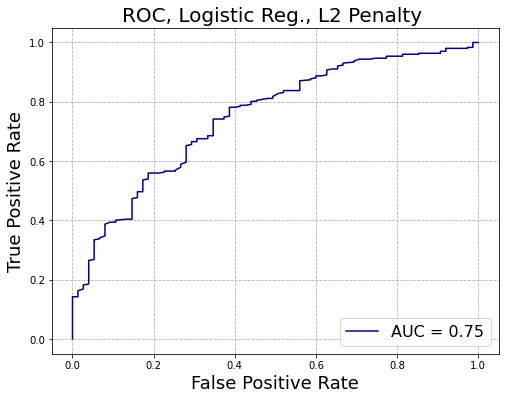

In [20]:
fig_lr_l2, ax_lr_l2 = custom_roc_curve(y_tt_test, y_prob_l2)

ax_lr_l2.set_title("ROC, Logistic Reg., L2 Penalty ", fontsize = 20)

# save_figures
if save_figures:
    fig_name = f"{figure_path}ROC Logistic L2 Penalty"
    fig_lr_l2.savefig(f"{fig_name}.pdf", 
                      dpi = 300, 
                      bbox_inches="tight")
    fig_lr_l2.savefig(f"{fig_name}.png", 
                      dpi = 300, 
                      bbox_inches="tight")
    fig_lr_l2.savefig(f"{fig_name}.svg", 
                      dpi = 300, 
                      bbox_inches="tight")

### Logistic Regression Elastic Net

In [21]:
random_state_LR = 132
LR_el = LogisticRegression(penalty = 'elasticnet', 
                           solver = 'saga', 
                           random_state = random_state_LR,
                           fit_intercept = False, 
                           max_iter = 10000)
LR_el

LogisticRegression(fit_intercept=False, max_iter=10000, penalty='elasticnet',
                   random_state=132, solver='saga')

In [22]:
c_penalty = np.logspace(-3, 2, 21)
l1_ratio = np.linspace(0.1, 0.9, 9)
params_el = {'C':c_penalty, 
             'l1_ratio':l1_ratio, 
             'class_weight':[None, 'balanced']}

gridCV_el = GridSearchCV(estimator = LR_el, 
                         param_grid = params_el, 
                         scoring = 'balanced_accuracy', 
                         n_jobs = -2,
                         refit = True, 
                         cv = 5, verbose = 1)

In [23]:
%%time
gridCV_el.fit(X_tt_train, y_tt_train)

Fitting 5 folds for each of 378 candidates, totalling 1890 fits
Wall time: 5min 17s


GridSearchCV(cv=5,
             estimator=LogisticRegression(fit_intercept=False, max_iter=10000,
                                          penalty='elasticnet',
                                          random_state=132, solver='saga'),
             n_jobs=-2,
             param_grid={'C': array([1.00000000e-03, 1.77827941e-03, 3.16227766e-03, 5.62341325e-03,
       1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02]),
                         'class_weight': [None, 'balanced'],
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='balanced_accuracy', verbose=1)

In [24]:
y_pred_el = gridCV_el.predict(X_tt_test)
y_prob_el = gridCV_el.predict_proba(X_tt_test)[:,1]
gridCV_el.best_params_

{'C': 0.1778279410038923, 'class_weight': 'balanced', 'l1_ratio': 0.4}

In [25]:
balanced_accuracy_score(y_tt_test, y_pred_el)

0.6777041942604856

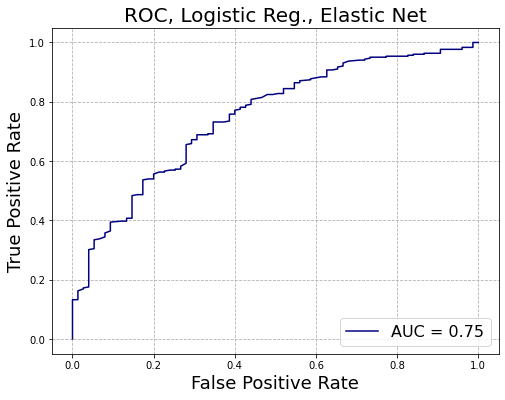

In [26]:
fig_lr_el, ax_lr_el = custom_roc_curve(y_tt_test, y_prob_el)

ax_lr_el.set_title("ROC, Logistic Reg., Elastic Net", fontsize = 20)

# save_figures
if save_figures:
    fig_name = f"{figure_path}ROC Logistic Elastic Net"
    fig_lr_el.savefig(f"{fig_name}.pdf", 
                      dpi = 300, 
                      bbox_inches="tight")
    fig_lr_el.savefig(f"{fig_name}.png", 
                      dpi = 300, 
                      bbox_inches="tight")
    fig_lr_el.savefig(f"{fig_name}.svg", 
                      dpi = 300, 
                      bbox_inches="tight")

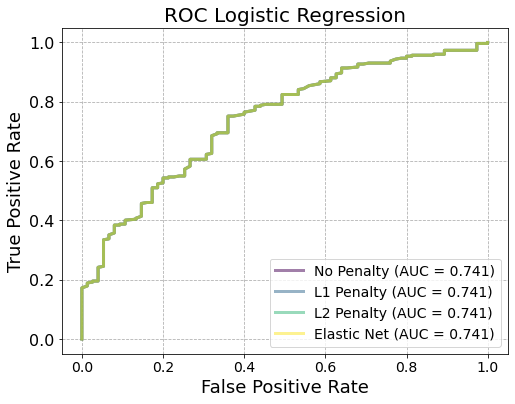

In [27]:
fig_lr_all, ax_lr_all = plt.subplots()


probs = [y_prob_no, y_prob_l1, y_prob_l2, y_prob_el]
labels = ["No Penalty", "L1 Penalty", "L2 Penalty", "Elastic Net"]

cmap_viridis = plt.get_cmap("viridis")
colors_viridis = cmap_viridis([0, 1/3, 2/3, 1])

for each_prob, each_label, each_color in zip(probs, labels, colors_viridis):
    fpr_lr_temp, tpr_lr_temp, p_crits_lr_temp = roc_curve(y_tt_test, y_prob_no) 

    display = RocCurveDisplay(fpr = fpr_lr_temp, 
                              tpr = tpr_lr_temp)
    auc_lr_temp = auc(fpr_lr_temp, tpr_lr_temp)
    display.plot(ax = ax_lr_all, 
                 color = each_color, 
                 alpha = 0.5, 
                 linewidth = 3, 
                 label = f"{each_label} (AUC = {auc_lr_temp:0.3f})")

fig_lr_all.set_size_inches([8, 6])

ax_lr_all.set_xlabel(ax_lr_all.get_xlabel(), fontsize = 18)
ax_lr_all.set_ylabel(ax_lr_all.get_ylabel(), fontsize = 18)
ax_lr_all.set_title("ROC Logistic Regression", fontsize = 20)

ticklabels = [f"{x:2.1f}" for x in np.arange(0, 1.01, 0.2)]
ax_lr_all.set_xticks(np.arange(0, 1.01, 0.2))
ax_lr_all.set_xticklabels(ticklabels, fontsize = 14)

ax_lr_all.set_yticks(np.arange(0, 1.01, 0.2))
ax_lr_all.set_yticklabels(ticklabels, fontsize = 16)


ax_lr_all.legend(fontsize = 14)
ax_lr_all.grid(linestyle = "dashed")

# save_figures
if save_figures:
    fig_name = f"{figure_path}ROC Logistic"
    fig_lr_all.savefig(f"{fig_name}.pdf", 
                      dpi = 300, 
                      bbox_inches="tight")
    fig_lr_all.savefig(f"{fig_name}.png", 
                      dpi = 300, 
                      bbox_inches="tight")
    fig_lr_all.savefig(f"{fig_name}.svg", 
                      dpi = 300, 
                      bbox_inches="tight")

In [28]:
import json

logistic_params = {"l1": gridCV_l1.best_params_,
"l2": gridCV_l2.best_params_,
"elastic": gridCV_el.best_params_}

with open("../results/logistic_params.json", "w") as outfile:
    json.dump(logistic_params, outfile)
    
# with open("logistic.json", "r") as readfile:
#     dict_data = json.load(readfile)

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def custom_confusin_matrix(y_test, y_pred, model_name):
    c_labels = [0, 1] 
    c_disp_labels = ["Not Green", "Green"]

    c_matrix = confusion_matrix(y_test, y_pred,
                                labels = c_labels)
    c_mat_display = ConfusionMatrixDisplay(confusion_matrix = c_matrix,
                                           display_labels = c_disp_labels)

    fig_con, ax_con = plt.subplots()

    c_mat_display.plot(ax = ax_con, cmap = "PuBu")
    ax_con.set_xlabel(ax_con.get_xlabel(), fontsize = 16)
    ax_con.set_ylabel(ax_con.get_ylabel(), fontsize = 16)
    ax_con.set_title(model_name, fontsize = 18)

    text_artists = ax_con.get_children()[0:4]
    for each_text in text_artists:
        each_text.set_fontsize(14)

    ax_con.set_xticks(ax_con.get_xticks())
    ax_con.set_xticklabels(c_disp_labels, fontsize = 14)

    ax_con.set_yticks(ax_con.get_xticks())
    ax_con.set_yticklabels(c_disp_labels, fontsize = 14)

    fig_con.set_size_inches([8, 6])
    
    return fig_con, ax_con


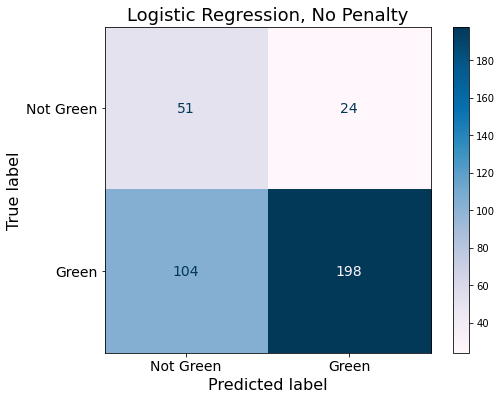

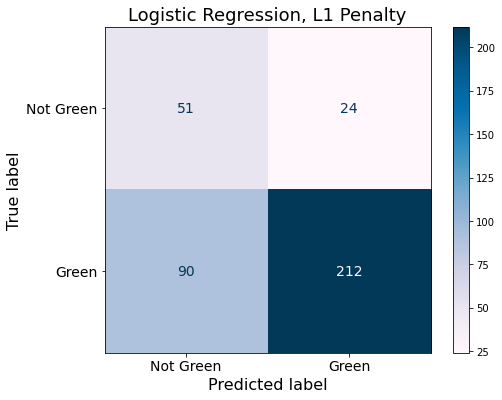

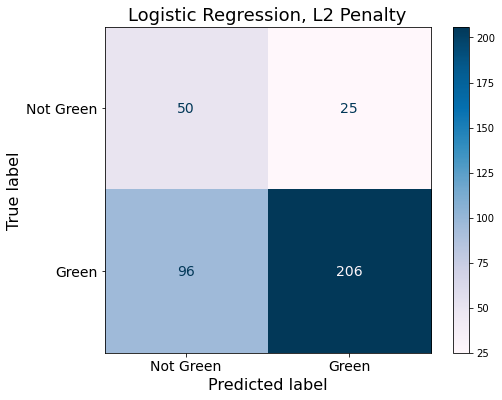

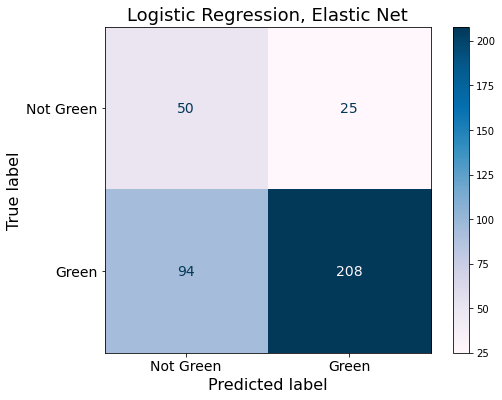

In [32]:
fig_con_no, ax_con_no = custom_confusin_matrix(y_tt_test, y_pred_no, "Logistic Regression, No Penalty")
fig_con_l1, ax_con_l1 = custom_confusin_matrix(y_tt_test, y_pred_l1, "Logistic Regression, L1 Penalty")
fig_con_l2, ax_con_l2 = custom_confusin_matrix(y_tt_test, y_pred_l2, "Logistic Regression, L2 Penalty")
fig_con_el, ax_con_el = custom_confusin_matrix(y_tt_test, y_pred_el, "Logistic Regression, Elastic Net")

cm_figs = [fig_con_no, fig_con_l1, fig_con_l2, fig_con_el]
fig_file_names = ["CM Logistic No Penalty", "CM Logistic L1 Penalty", "CM Logistic L2 Penalty", "CM Logistic Elastic Net"]

# save_figures
if save_figures:
    for each_f, each_n in zip(cm_figs, fig_file_names):
        fig_name = f"{figure_path}{each_n}"
        each_f.savefig(f"{fig_name}.pdf", 
                       dpi = 300, 
                       bbox_inches="tight")
        each_f.savefig(f"{fig_name}.png", 
                       dpi = 300, 
                       bbox_inches="tight")
        each_f.savefig(f"{fig_name}.svg", 
                       dpi = 300, 
                        bbox_inches="tight")